In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arwabasal/brain-tumor-mri-detection")

print("Path to dataset files:", path)

C:\Users\Eshan\Desktop\Learning\Practice\NEW-VENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Eshan\.cache\kagglehub\datasets\arwabasal\brain-tumor-mri-detection\versions\1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import seaborn as sns
import cv2

In [3]:
os.chdir(path)

In [4]:
os.getcwd()

'C:\\Users\\Eshan\\.cache\\kagglehub\\datasets\\arwabasal\\brain-tumor-mri-detection\\versions\\1'

In [5]:
no_list = os.path.join('no')
yes_list = os.path.join('yes')

In [6]:
img_list = []
classes = []
width, height = 128,128
for i in os.listdir(yes_list):
    classes.append(1)
    img = cv2.imread(os.path.join(yes_list,i))
    img = cv2.resize(img, (width,height))
    img_list.append(img)

for i in os.listdir(no_list):
    classes.append(0)
    img = cv2.imread(os.path.join(no_list,i))
    img = cv2.resize(img, (width,height))
    img_list.append(img)


In [7]:
img_array = np.array(img_list)
classes_array = np.array(classes)

class_names = ['No Tumor Detected', 'Tumor Detected']

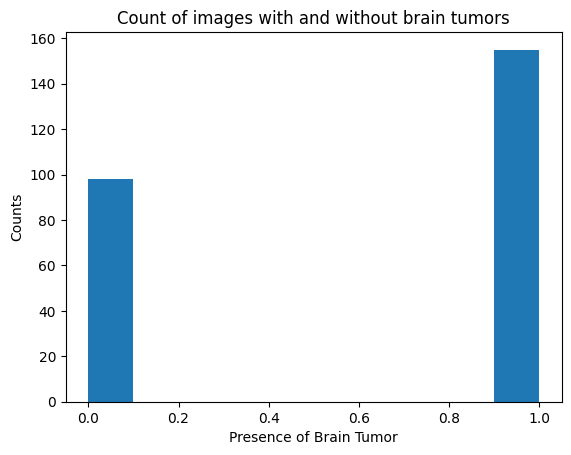

In [8]:
#How many counts are there for each class

plt.figure()
plt.xlabel('Presence of Brain Tumor')
plt.ylabel('Counts')
plt.title('Count of images with and without brain tumors')
plt.hist(classes_array)
plt.show()

In [9]:
no_tumor_count = len(classes_array) - np.count_nonzero(classes_array==1)
yes_tumor_count = np.count_nonzero(classes_array==1)
print(f'Number of images with no tumor detected: {no_tumor_count} \nNumber of images with a tumor detected: {yes_tumor_count}')

Number of images with no tumor detected: 98 
Number of images with a tumor detected: 155


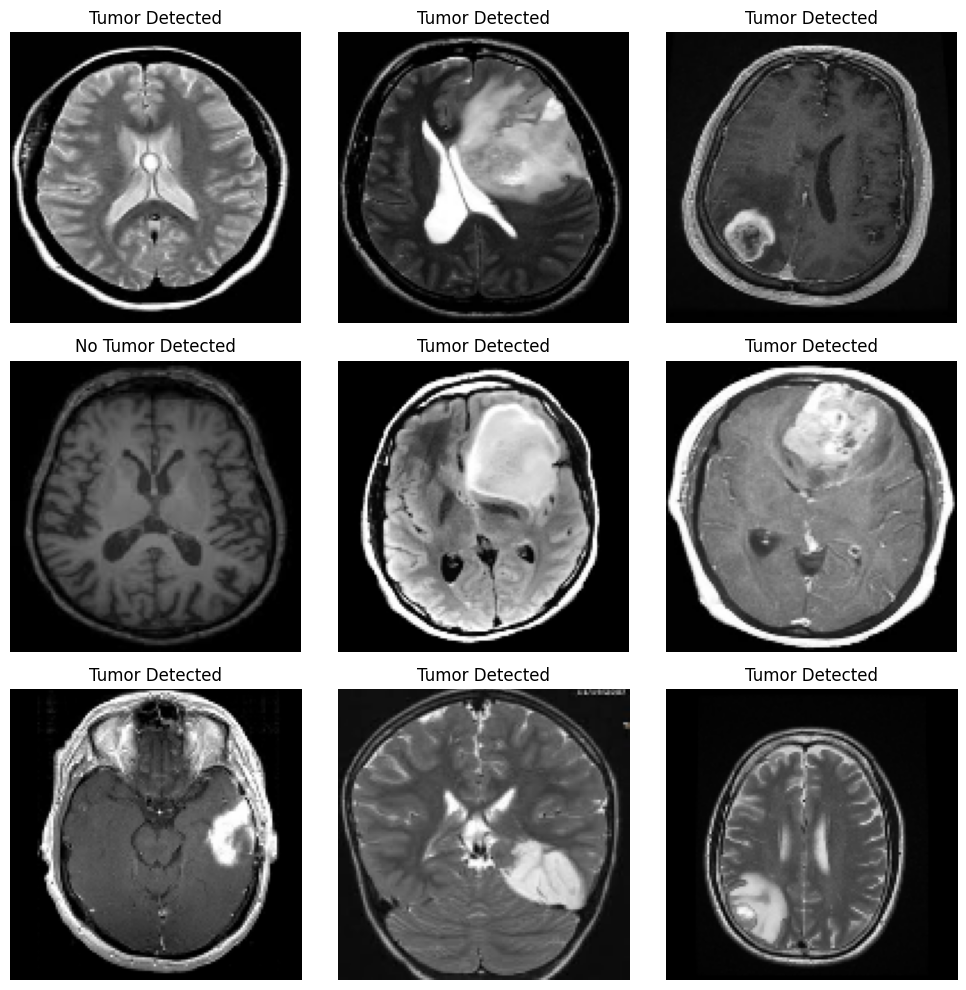

In [10]:
#Visualize random sample of images
plt.figure(figsize = (10,10))
for i in range(9):
    m = np.random.randint(0,len(classes_array))
    plt.subplot(3,3,i+1)
    plt.imshow(img_array[m])
    plt.title(class_names[classes[m]])
    plt.axis(False)
plt.tight_layout()
plt.show()

In [11]:
#Training and Validation
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(img_array,classes_array, test_size = 0.25, random_state = 42)

print(f"X_train shape: {X_train.shape} \nX_val shape: {X_val.shape} \nY_train shape: {Y_train.shape} \nY_val shape: {Y_val.shape}")

X_train shape: (189, 128, 128, 3) 
X_val shape: (64, 128, 128, 3) 
Y_train shape: (189,) 
Y_val shape: (64,)


In [12]:
from tensorflow import keras
import tensorflow as tf

In [13]:
#Data Augmentation
data_aug = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255, input_shape = (128,128,3)),
                                tf.keras.layers.RandomRotation(0.2),
                                tf.keras.layers.RandomZoom(0.3),
                                tf.keras.layers.RandomFlip('horizontal_and_vertical'),
                                tf.keras.layers.RandomContrast(0.15, [0,1]),
                                tf.keras.layers.RandomGaussianBlur(0.2,kernel_size = 3,value_range= [0,1])])

C:\Users\Eshan\Desktop\Learning\Practice\NEW-VENV\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
data_aug.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 128, 128, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 128, 128, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_gaussian_blur            │ (None, 128, 128, 3)    │             0 │
│ (RandomGaussianBlur)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

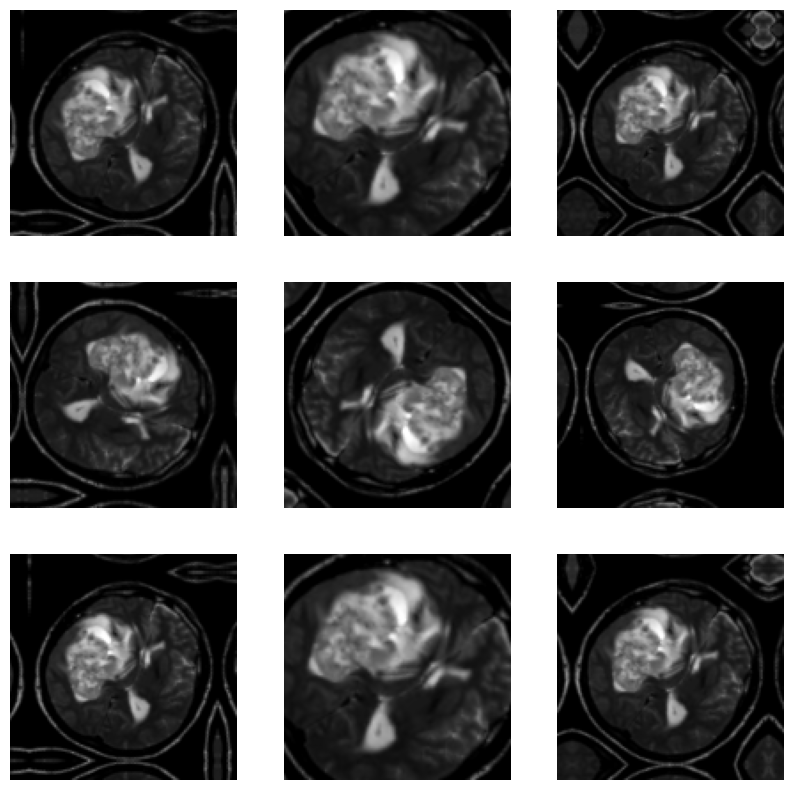

In [15]:
#Visualize augmentation on sample image
plt.figure(figsize = (10,10))
m = np.random.randint(0,len(X_train))
for i in range(9):
    plt.subplot(3,3,i+1)
    img_aug = data_aug(X_train)
    plt.imshow(img_aug[m])
    plt.axis(False)


In [16]:
#Create model
NN = tf.keras.Sequential([data_aug,
                          tf.keras.layers.Conv2D(64, activation = 'relu', kernel_size = 3,strides = 2, padding = 'same'),
                          tf.keras.layers.MaxPooling2D(2),
                          tf.keras.layers.Conv2D(128, activation = 'relu', kernel_size = 3, strides = 2, padding = 'same'),
                          tf.keras.layers.MaxPooling2D(),
                          tf.keras.layers.Conv2D(254, activation = 'relu', kernel_size = 3, strides = 2, padding = 'same'),
                          tf.keras.layers.MaxPooling2D(),

                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(508,activation = 'relu'),
                          tf.keras.layers.Dense(1,activation = 'sigmoid')
                         ])

In [17]:
NN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 254)      │       292,862 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 254)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1016)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 508)            │       516,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           509 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 885,655 (3.38 MB)

 Trainable params: 885,655 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#NN.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01,momentum = 0.01,nesterov = True),
#           loss = tf.keras.losses.BinaryFocalCrossentropy(),
#           metrics = ['accuracy'])
NN.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01),
           loss = 'binary_crossentropy',
           metrics = ['accuracy'])
earlystop = tf.keras.callbacks.EarlyStopping(patience = 10)

In [19]:
history = NN.fit(X_train,Y_train, validation_data = (X_val,Y_val),epochs = 100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.4762 - loss: 2.3720 - val_accuracy: 0.5781 - val_loss: 0.6956
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.5767 - loss: 0.6906 - val_accuracy: 0.5781 - val_loss: 0.6825
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6243 - loss: 0.6708 - val_accuracy: 0.5781 - val_loss: 0.6906
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.6243 - loss: 0.6657 - val_accuracy: 0.5781 - val_loss: 0.6888
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.6243 - loss: 0.6640 - val_accuracy: 0.5781 - val_loss: 0.6821
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.6243 - loss: 0.6637 - val_accuracy: 0.5781 - val_loss: 0.6836
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.6243 - loss: 0.6624 - val_accuracy: 0.5781 - val_loss: 0.6845
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.6243 - loss: 0.6671 - val_accuracy: 0.5781 - v

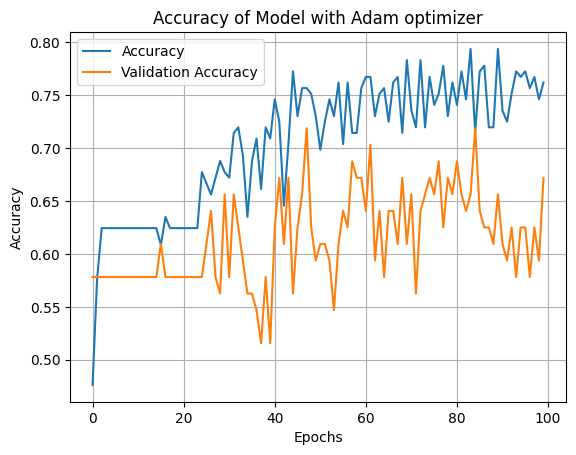

In [20]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Model with Adam optimizer")
plt.legend()
plt.grid()

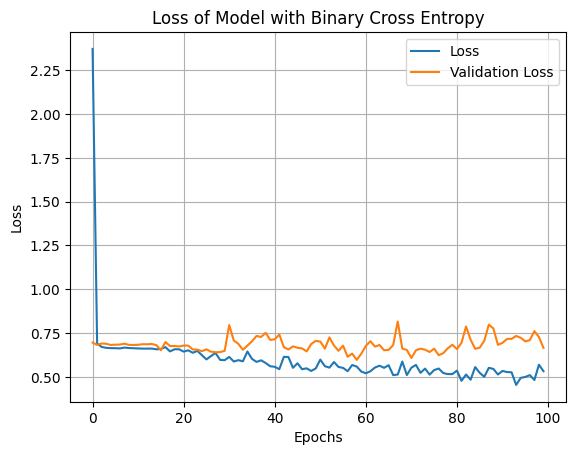

In [21]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss of Model with Binary Cross Entropy')
plt.legend()
plt.grid()

In [22]:
NN2 = tf.keras.Sequential([data_aug,
                          tf.keras.layers.Conv2D(64, activation = 'relu', kernel_size = 3,strides = 2, padding = 'same'),
                          tf.keras.layers.MaxPooling2D(2),
                          tf.keras.layers.Conv2D(128, activation = 'relu', kernel_size = 3, strides = 2, padding = 'same'),
                          tf.keras.layers.MaxPooling2D(),
                          tf.keras.layers.Conv2D(254, activation = 'relu', kernel_size = 3, strides = 2, padding = 'same'),
                          tf.keras.layers.MaxPooling2D(),

                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(508,activation = 'relu'),
                          tf.keras.layers.Dense(1,activation = 'sigmoid')
                         ])

In [23]:
NN2.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01,momentum = 0.01,nesterov = True),
           loss = tf.keras.losses.BinaryFocalCrossentropy(),
           metrics = ['accuracy'])

In [24]:
history2 = NN2.fit(X_train,Y_train, validation_data = (X_val,Y_val),epochs = 100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.3704 - loss: 0.1764 - val_accuracy: 0.6406 - val_loss: 0.1717
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.5450 - loss: 0.1729 - val_accuracy: 0.5781 - val_loss: 0.1699
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.6190 - loss: 0.1703 - val_accuracy: 0.5781 - val_loss: 0.1687
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6243 - loss: 0.1677 - val_accuracy: 0.5781 - val_loss: 0.1680
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.6243 - loss: 0.1674 - val_accuracy: 0.5781 - val_loss: 0.1675
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6243 - loss: 0.1662 - val_accuracy: 0.5781 - val_loss: 0.1672
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6243 - loss: 0.1652 - val_accuracy: 0.5781 - val_loss: 0.1670
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6243 - loss: 0.1644 - val_accuracy: 0.5781 - v

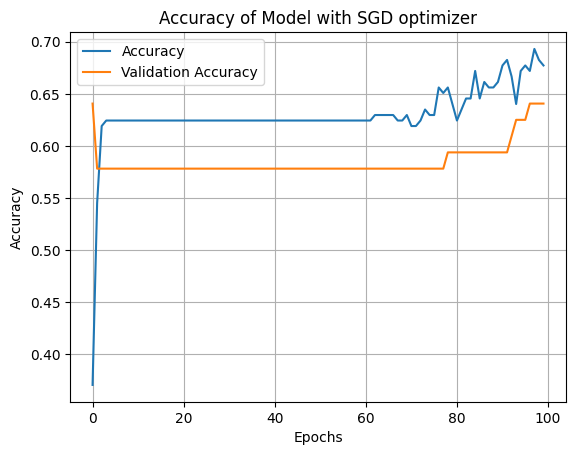

In [25]:
history2_df = pd.DataFrame(history2.history)
plt.plot(history2_df.accuracy,label="Accuracy")
plt.plot(history2_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Model with SGD optimizer")
plt.legend()
plt.grid()
plt.show()

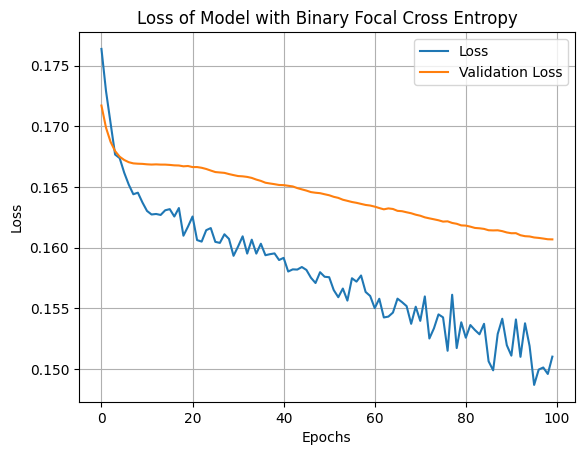

In [29]:
history2_df = pd.DataFrame(history2.history)
plt.plot(history2_df.loss,label="Loss")
plt.plot(history2_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss of Model with Binary Focal Cross Entropy')
plt.legend()
plt.grid()